In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH_TO_TRAIN_DATA = 'gdrive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(PATH_TO_TRAIN_DATA)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_map = {"Yes":1, "No":0}
df["Churn"] = df["Churn"].map(churn_map)
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
display(df.head())
display(df.describe())
display(df.shape)
display(df.info())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


(7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.iloc[:, 1:].columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


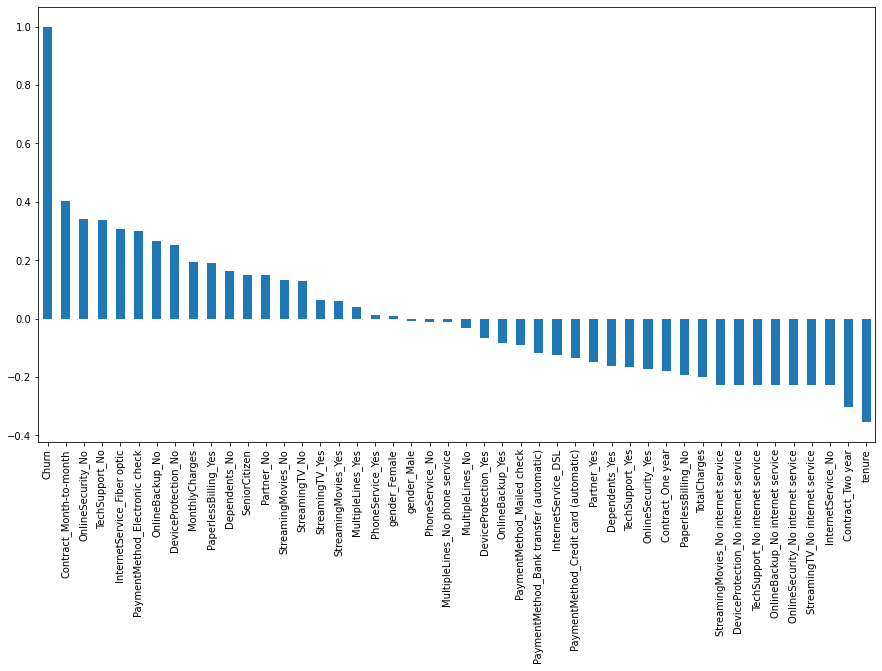

In [ ]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler

features = X.columns.values

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

X.columns = features

In [ ]:
# Create Train & Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4922, 45), (2110, 45), (4922,), (2110,))

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE
oversample_smote = SMOTE()
# ADASYN
from imblearn.over_sampling import ADASYN
oversample_adasyn = ADASYN()
# ROS
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
# RUS
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
# SMOTE BorderLine
from imblearn.over_sampling import BorderlineSMOTE
smote_borderline = BorderlineSMOTE()
# SMOTE ENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
# SMOTE TOMEK
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# RECALL
# PRECISION
# F1 Score
from sklearn.metrics import classification_report
# AUPRC
from sklearn.metrics import average_precision_score

In [ ]:
# Все выборки

X_train_smote, y_train_smote =  oversample_smote.fit_resample(X_train, y_train)
X_train_adasyn, y_train_adasyn =  oversample_adasyn.fit_resample(X_train, y_train)
print('SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('ADASYN: ', X_train_adasyn.shape, y_train_adasyn.shape)


X_train_ros, y_train_ros =  ros.fit_resample(X_train, y_train)
X_train_rus, y_train_rus =  rus.fit_resample(X_train, y_train)
print('ROS: ', X_train_ros.shape, y_train_ros.shape)
print('RUS: ', X_train_rus.shape, y_train_rus.shape)

X_train_smote_bl, y_train_smote_bl =  smote_borderline.fit_resample(X_train, y_train)
X_train_smote_enn, y_train_smote_enn =  smote_enn.fit_resample(X_train, y_train)
X_train_smote_tomek, y_train_smote_tomek =  smote_tomek.fit_resample(X_train, y_train)
print('SMOTE BorderLine: ', X_train_smote_bl.shape, y_train_smote_bl.shape)
print('SMOTE ENN: ', X_train_smote_enn.shape, y_train_smote_enn.shape)
print('SMOTE Tomek: ', X_train_smote_tomek.shape, y_train_smote_tomek.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


SMOTE:  (7226, 45) (7226,)
ADASYN:  (7228, 45) (7228,)
ROS:  (7226, 45) (7226,)
RUS:  (2618, 45) (2618,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

SMOTE BorderLine:  (7226, 45) (7226,)
SMOTE ENN:  (4344, 45) (4344,)
SMOTE Tomek:  (6860, 45) (6860,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from numpy import arange
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# param gridы

#log reg param grid

#random forest param grid

#xgb param grid
param_dist_xgb = {"max_depth": [10,30],
					"min_child_weight" : [1,3,6],
					"n_estimators": [10, 20, 30],
					"learning_rate": [0.05, 0.1, 0.5]}


#cb param grid

param_grid_cb = {'learning_rate': [0.05, 0.1, 0.5],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [ ]:
#SMOTE
#ADASYN
#ROS
#RUS
#SMOTE BL
#SMOTE ENN
#SMOTE Tomek

In [ ]:
# log reg
from sklearn.linear_model import LogisticRegression

recall_lr = []
precision_lr = []
f1_lr = []
auprc_lr = []

# SMOTE 
lr = LogisticRegression()
grid_values_lr = {'penalty': ['l1','l2'],
               'C': [0.001,0.01,0.1,1,10,100,1000]
               }

grid_search = GridSearchCV(lr, param_grid=grid_values_lr, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)

lr_model = grid_search.best_estimator_

y_pred_smote_lr = lr_model.predict(X_test.values)

recall_lr.append(recall_score(y_test, y_pred_smote_lr))
precision_lr.append(precision_score(y_test, y_pred_smote_lr))
f1_lr.append(f1_score(y_test, y_pred_smote_lr))
auprc_lr.append(average_precision_score(y_test, y_pred_smote_lr))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1786s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1219s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.9s finished


In [ ]:
print(recall_lr)
print(precision_lr)
print(f1_lr)
print(auprc_lr)

[0.7714285714285715, 0.8017857142857143, 0.7785714285714286, 0.7946428571428571, 0.8142857142857143, 0.8553571428571428, 0.7625]
[0.5179856115107914, 0.48175965665236054, 0.5087514585764294, 0.500562429696288, 0.49404117009750814, 0.4583732057416268, 0.5077288941736029]
[0.6197991391678622, 0.6018766756032171, 0.6153846153846154, 0.6142167011732229, 0.614969656102495, 0.5968847352024922, 0.609564596716631]
[0.46025240741732953, 0.4388746454941434, 0.45486712240349697, 0.45227072898047527, 0.45157976660546584, 0.43046142121784425, 0.4501764571628224]


In [ ]:
# log reg
# ADASYN
lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid=grid_values_lr, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_adasyn, y_train_adasyn)

lr_model = grid_search.best_estimator_

y_pred_adasyn_lr = lr_model.predict(X_test.values)

recall_lr.append(recall_score(y_test, y_pred_adasyn_lr))
precision_lr.append(precision_score(y_test, y_pred_adasyn_lr))
f1_lr.append(f1_score(y_test, y_pred_adasyn_lr))
auprc_lr.append(average_precision_score(y_test, y_pred_adasyn_lr))

#ROS
lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid=grid_values_lr, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_ros, y_train_ros)

lr_model = grid_search.best_estimator_

y_pred_ros_lr = lr_model.predict(X_test.values)

recall_lr.append(recall_score(y_test, y_pred_ros_lr))
precision_lr.append(precision_score(y_test, y_pred_ros_lr))
f1_lr.append(f1_score(y_test, y_pred_ros_lr))
auprc_lr.append(average_precision_score(y_test, y_pred_ros_lr))

#RUS
lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid=grid_values_lr, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_rus, y_train_rus)

lr_model = grid_search.best_estimator_

y_pred_rus_lr = lr_model.predict(X_test.values)

recall_lr.append(recall_score(y_test, y_pred_rus_lr))
precision_lr.append(precision_score(y_test, y_pred_rus_lr))
f1_lr.append(f1_score(y_test, y_pred_rus_lr))
auprc_lr.append(average_precision_score(y_test, y_pred_rus_lr))


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1798s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1045s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.9s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0106s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0852s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1648s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.1s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0074s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0451s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1047s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.6s finished


In [ ]:
# log reg
#SMOTE BL
lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid=grid_values_lr, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_bl, y_train_smote_bl)

lr_model = grid_search.best_estimator_

y_pred_smote_bl_lr = lr_model.predict(X_test.values)

recall_lr.append(recall_score(y_test, y_pred_smote_bl_lr))
precision_lr.append(precision_score(y_test, y_pred_smote_bl_lr))
f1_lr.append(f1_score(y_test, y_pred_smote_bl_lr))
auprc_lr.append(average_precision_score(y_test, y_pred_smote_bl_lr))

#SMOTE ENN
lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid=grid_values_lr, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_enn, y_train_smote_enn)

lr_model = grid_search.best_estimator_

y_pred_smote_enn_lr = lr_model.predict(X_test.values)

recall_lr.append(recall_score(y_test, y_pred_smote_enn_lr))
precision_lr.append(precision_score(y_test, y_pred_smote_enn_lr))
f1_lr.append(f1_score(y_test, y_pred_smote_enn_lr))
auprc_lr.append(average_precision_score(y_test, y_pred_smote_enn_lr))

#SMOTE Tomek
lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid=grid_values_lr, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_tomek, y_train_smote_tomek)

lr_model = grid_search.best_estimator_

y_pred_smote_tomek_lr = lr_model.predict(X_test.values)

recall_lr.append(recall_score(y_test, y_pred_smote_tomek_lr))
precision_lr.append(precision_score(y_test, y_pred_smote_tomek_lr))
f1_lr.append(f1_score(y_test, y_pred_smote_tomek_lr))
auprc_lr.append(average_precision_score(y_test, y_pred_smote_tomek_lr))


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0090s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0616s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1943s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.2s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0095s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0095s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0514s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1973s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.8s finished


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0089s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0089s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1216s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    1.1s finished


In [ ]:
# log reg
print(recall_lr)
print(precision_lr)
print(f1_lr)
print(auprc_lr)

[0.7714285714285715, 0.8017857142857143, 0.7785714285714286, 0.7946428571428571, 0.8142857142857143, 0.8553571428571428, 0.7625]
[0.5179856115107914, 0.48175965665236054, 0.5087514585764294, 0.500562429696288, 0.49404117009750814, 0.4583732057416268, 0.5077288941736029]
[0.6197991391678622, 0.6018766756032171, 0.6153846153846154, 0.6142167011732229, 0.614969656102495, 0.5968847352024922, 0.609564596716631]
[0.46025240741732953, 0.4388746454941434, 0.45486712240349697, 0.45227072898047527, 0.45157976660546584, 0.43046142121784425, 0.4501764571628224]


In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier

recall_rf = []
precision_rf = []
f1_rf = []
auprc_rf = []

param_grid_rf = {'bootstrap': [True, False],
 'max_depth': [10, 50, 100],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 10],
 'n_estimators': [200, 500]}

 #SMOTE
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid=param_grid_rf, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)

rf_model = grid_search.best_estimator_

y_pred_smote_rf = rf_model.predict(X_test.values)

recall_rf.append(recall_score(y_test, y_pred_smote_rf))
precision_rf.append(precision_score(y_test, y_pred_smote_rf))
f1_rf.append(f1_score(y_test, y_pred_smote_rf))
auprc_rf.append(average_precision_score(y_test, y_pred_smote_rf))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

In [ ]:
print(recall_rf)
print(precision_rf)
print(f1_rf)
print(auprc_rf)

[0.5821428571428572]
[0.6025878003696857]
[0.592188919164396]
[0.4616926577202878]


In [ ]:
# random forest
#ADASYN

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid=param_grid_rf, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_adasyn, y_train_adasyn)

rf_model = grid_search.best_estimator_

y_pred_adasyn_rf = rf_model.predict(X_test.values)

recall_rf.append(recall_score(y_test, y_pred_adasyn_rf))
precision_rf.append(precision_score(y_test, y_pred_adasyn_rf))
f1_rf.append(f1_score(y_test, y_pred_adasyn_rf))
auprc_rf.append(average_precision_score(y_test, y_pred_adasyn_rf))

#ROS

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid=param_grid_rf, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_ros, y_train_ros)

rf_model = grid_search.best_estimator_

y_pred_ros_rf = rf_model.predict(X_test.values)

recall_rf.append(recall_score(y_test, y_pred_ros_rf))
precision_rf.append(precision_score(y_test, y_pred_ros_rf))
f1_rf.append(f1_score(y_test, y_pred_ros_rf))
auprc_rf.append(average_precision_score(y_test, y_pred_ros_rf))

#RUS

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid=param_grid_rf, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_rus, y_train_rus)

rf_model = grid_search.best_estimator_

y_pred_rus_rf = rf_model.predict(X_test.values)

recall_rf.append(recall_score(y_test, y_pred_rus_rf))
precision_rf.append(precision_score(y_test, y_pred_rus_rf))
f1_rf.append(f1_score(y_test, y_pred_rus_rf))
auprc_rf.append(average_precision_score(y_test, y_pred_rus_rf))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

In [ ]:
# random forest
#SMOTE BL

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid=param_grid_rf, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_bl, y_train_smote_bl)

rf_model = grid_search.best_estimator_

y_pred_smote_bl_rf = rf_model.predict(X_test.values)

recall_rf.append(recall_score(y_test, y_pred_smote_bl_rf))
precision_rf.append(precision_score(y_test, y_pred_smote_bl_rf))
f1_rf.append(f1_score(y_test, y_pred_smote_bl_rf))
auprc_rf.append(average_precision_score(y_test, y_pred_smote_bl_rf))
#SMOTE ENN

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid=param_grid_rf, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_enn, y_train_smote_enn)

rf_model = grid_search.best_estimator_

y_pred_smote_enn_rf = rf_model.predict(X_test.values)

recall_rf.append(recall_score(y_test, y_pred_smote_enn_rf))
precision_rf.append(precision_score(y_test, y_pred_smote_enn_rf))
f1_rf.append(f1_score(y_test, y_pred_smote_enn_rf))
auprc_rf.append(average_precision_score(y_test, y_pred_smote_enn_rf))
#SMOTE Tomek

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid=param_grid_rf, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_tomek, y_train_smote_tomek)

rf_model = grid_search.best_estimator_

y_pred_smote_tomek_rf = rf_model.predict(X_test.values)

recall_rf.append(recall_score(y_test, y_pred_smote_tomek_rf))
precision_rf.append(precision_score(y_test, y_pred_smote_tomek_rf))
f1_rf.append(f1_score(y_test, y_pred_smote_tomek_rf))
auprc_rf.append(average_precision_score(y_test, y_pred_smote_tomek_rf))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

In [ ]:
print(recall_rf)
print(precision_rf)
print(f1_rf)
print(auprc_rf)

[0.5821428571428572, 0.5321428571428571, 0.4714285714285714, 0.8035714285714286, 0.6375, 0.7732142857142857, 0.5482142857142858]
[0.6025878003696857, 0.5889328063241107, 0.624113475177305, 0.5119453924914675, 0.5881383855024712, 0.49204545454545456, 0.596116504854369]
[0.592188919164396, 0.5590994371482176, 0.5371312309257374, 0.6254343293954135, 0.6118251928020565, 0.6013888888888889, 0.5711627906976745]
[0.4616926577202878, 0.43756700233621726, 0.4345092842017315, 0.46351739181673024, 0.4711467515635126, 0.4406461481350403, 0.44670479718137657]


In [ ]:
# XGB
import xgboost as xgb

recall_xgb = []
precision_xgb = []
f1_xgb = []
auprc_xgb = []

#SMOTE
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_dist_xgb, cv = 3, 
                verbose=10, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

xgb_model = grid_search.best_estimator_

y_pred_smote_xgboost = xgb_model.predict(X_test.values)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

In [ ]:
print(classification_report(y_test, y_pred_smote_xgboost))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1572
           1       0.58      0.63      0.60       538

    accuracy                           0.79      2110
   macro avg       0.73      0.74      0.73      2110
weighted avg       0.80      0.79      0.79      2110



In [ ]:
print(recall_score(y_test, y_pred_smote_xgboost))
print(precision_score(y_test, y_pred_smote_xgboost))
print(f1_score(y_test, y_pred_smote_xgboost))

average_precision = average_precision_score(y_test, y_pred_smote_xgboost)
print('Average precision-recall score: {0:0.2f}'.format(
     average_precision))

recall_xgb.append(recall_score(y_test, y_pred_smote_xgboost))
precision_xgb.append(precision_score(y_test, y_pred_smote_xgboost))
f1_xgb.append(f1_score(y_test, y_pred_smote_xgboost))
auprc_xgb.append(average_precision_score(y_test, y_pred_smote_xgboost))

0.5820379965457686
0.6263940520446096
0.6034019695613251
Average precision-recall score: 0.46


In [ ]:
# XGB

#ADASYN
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_dist_xgb, cv = 3, 
                verbose=10, n_jobs=-1)
grid_search.fit(X_train_adasyn, y_train_adasyn)

xgb_model = grid_search.best_estimator_

y_pred_adasyn_xgboost = xgb_model.predict(X_test.values)

recall_xgb.append(recall_score(y_test, y_pred_adasyn_xgboost))
precision_xgb.append(precision_score(y_test, y_pred_adasyn_xgboost))
f1_xgb.append(f1_score(y_test, y_pred_adasyn_xgboost))
auprc_xgb.append(average_precision_score(y_test, y_pred_adasyn_xgboost))

#ROS
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_dist_xgb, cv = 3, 
                verbose=10, n_jobs=-1)
grid_search.fit(X_train_ros, y_train_ros)

xgb_model = grid_search.best_estimator_

y_pred_ros_xgboost = xgb_model.predict(X_test.values)

recall_xgb.append(recall_score(y_test, y_pred_ros_xgboost))
precision_xgb.append(precision_score(y_test, y_pred_ros_xgboost))
f1_xgb.append(f1_score(y_test, y_pred_ros_xgboost))
auprc_xgb.append(average_precision_score(y_test, y_pred_ros_xgboost))

#RUS
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_dist_xgb, cv = 3, 
                verbose=10, n_jobs=-1)
grid_search.fit(X_train_rus, y_train_rus)

xgb_model = grid_search.best_estimator_

y_pred_rus_xgboost = xgb_model.predict(X_test.values)

recall_xgb.append(recall_score(y_test, y_pred_rus_xgboost))
precision_xgb.append(precision_score(y_test, y_pred_rus_xgboost))
f1_xgb.append(f1_score(y_test, y_pred_rus_xgboost))
auprc_xgb.append(average_precision_score(y_test, y_pred_rus_xgboost))

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1411s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   20.8s finished


In [ ]:
print(recall_xgb)

[0.6263940520446096, 0.5576208178438662, 0.5464684014869888, 0.7732342007434945]


In [ ]:
print(precision_xgb)

[0.5820379965457686, 0.5758157389635317, 0.5776031434184676, 0.5110565110565111]


In [ ]:
print(f1_xgb)

[0.6034019695613251, 0.56657223796034, 0.5616045845272205, 0.6153846153846154]


In [ ]:
print(auprc_xgb)

[0.45984580260733954, 0.43388305181902037, 0.43128167690429026, 0.4529862780748103]


In [ ]:
# XGB

#SMOTE BL
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_dist_xgb, cv = 3, 
                verbose=10, n_jobs=-1)
grid_search.fit(X_train_smote_bl, y_train_smote_bl)

xgb_model = grid_search.best_estimator_

y_pred_smotebl_xgboost = xgb_model.predict(X_test.values)

recall_xgb.append(recall_score(y_test, y_pred_smotebl_xgboost))
precision_xgb.append(precision_score(y_test, y_pred_smotebl_xgboost))
f1_xgb.append(f1_score(y_test, y_pred_smotebl_xgboost))
auprc_xgb.append(average_precision_score(y_test, y_pred_smotebl_xgboost))

#SMOTE ENN
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_dist_xgb, cv = 3, 
                verbose=10, n_jobs=-1)
grid_search.fit(X_train_smote_enn, y_train_smote_enn)

xgb_model = grid_search.best_estimator_

y_pred_smoteenn_xgboost = xgb_model.predict(X_test.values)

recall_xgb.append(recall_score(y_test, y_pred_smoteenn_xgboost))
precision_xgb.append(precision_score(y_test, y_pred_smoteenn_xgboost))
f1_xgb.append(f1_score(y_test, y_pred_smoteenn_xgboost))
auprc_xgb.append(average_precision_score(y_test, y_pred_smoteenn_xgboost))

#SMOTE Tomek
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_dist_xgb, cv = 3, 
                verbose=10, n_jobs=-1)
grid_search.fit(X_train_smote_tomek, y_train_smote_tomek)

xgb_model = grid_search.best_estimator_

y_pred_smote_tomek_xgboost = xgb_model.predict(X_test.values)

recall_xgb.append(recall_score(y_test, y_pred_smote_tomek_xgboost))
precision_xgb.append(precision_score(y_test, y_pred_smote_tomek_xgboost))
f1_xgb.append(f1_score(y_test, y_pred_smote_tomek_xgboost))
auprc_xgb.append(average_precision_score(y_test, y_pred_smote_tomek_xgboost))

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1891s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   25.1s finished


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

In [ ]:
print(recall_xgb)

[0.6263940520446096, 0.5576208178438662, 0.5464684014869888, 0.7732342007434945, 0.6524163568773235, 0.7509293680297398, 0.5669144981412639]


In [ ]:
print(precision_xgb)

[0.5820379965457686, 0.5758157389635317, 0.5776031434184676, 0.5110565110565111, 0.560702875399361, 0.4873341375150784, 0.5616942909760589]


In [ ]:
print(f1_xgb)

[0.6034019695613251, 0.56657223796034, 0.5616045845272205, 0.6153846153846154, 0.6030927835051547, 0.5910753474762253, 0.5642923219241442]


In [ ]:
print(auprc_xgb)

[0.45984580260733954, 0.43388305181902037, 0.43128167690429026, 0.4529862780748103, 0.4544373196757526, 0.42946062490825543, 0.42885917736186574]


In [ ]:
# CB
!pip install catboost
import catboost
from catboost import Pool
from catboost import CatBoostClassifier

     |████████████████████████████████| 67.3MB 77kB/s 


In [ ]:
catboost.__version__

'0.25.1'

In [ ]:
# CB
recall_cb = []
precision_cb = []
f1_cb = []
auprc_cb = []


#SMOTE
model = CatBoostClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid_cb, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)

cb_model = grid_search.best_estimator_

y_pred_smote_cb = cb_model.predict(X_test.values)

recall_cb.append(recall_score(y_test, y_pred_smote_cb))
precision_cb.append(precision_score(y_test, y_pred_smote_cb))
f1_cb.append(f1_score(y_test, y_pred_smote_cb))
auprc_cb.append(average_precision_score(y_test, y_pred_smote_cb))

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 17.5min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused b

0:	learn: 0.6563022	total: 99.3ms	remaining: 1m 39s
1:	learn: 0.6268920	total: 179ms	remaining: 1m 29s
2:	learn: 0.5984005	total: 259ms	remaining: 1m 26s
3:	learn: 0.5736598	total: 347ms	remaining: 1m 26s
4:	learn: 0.5528102	total: 426ms	remaining: 1m 24s
5:	learn: 0.5343734	total: 506ms	remaining: 1m 23s
6:	learn: 0.5168624	total: 604ms	remaining: 1m 25s
7:	learn: 0.5003111	total: 684ms	remaining: 1m 24s
8:	learn: 0.4871996	total: 768ms	remaining: 1m 24s
9:	learn: 0.4743154	total: 849ms	remaining: 1m 24s
10:	learn: 0.4623459	total: 930ms	remaining: 1m 23s
11:	learn: 0.4514543	total: 1.01s	remaining: 1m 23s
12:	learn: 0.4423239	total: 1.09s	remaining: 1m 23s
13:	learn: 0.4326542	total: 1.17s	remaining: 1m 22s
14:	learn: 0.4251699	total: 1.26s	remaining: 1m 22s
15:	learn: 0.4187722	total: 1.34s	remaining: 1m 22s
16:	learn: 0.4118120	total: 1.42s	remaining: 1m 22s
17:	learn: 0.4054812	total: 1.5s	remaining: 1m 21s
18:	learn: 0.3996909	total: 1.59s	remaining: 1m 22s
19:	learn: 0.3937801	t

In [ ]:
print(recall_cb)
print(precision_cb)
print(f1_cb)
print(auprc_cb)

[0.5185873605947955]
[0.5873684210526315]
[0.5508390918065152]
[0.4273506543362935]


In [ ]:
# CB

#ADASYN
model = CatBoostClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid_cb, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_adasyn, y_train_adasyn) y_train

cb_model = grid_search.best_estimator_

y_pred_adasyn_cb = cb_model.predict(X_test.values)

recall_cb.append(recall_score(y_test, y_pred_adasyn_cb))
precision_cb.append(precision_score(y_test, y_pred_adasyn_cb))
f1_cb.append(f1_score(y_test, y_pred_adasyn_cb))
auprc_cb.append(average_precision_score(y_test, y_pred_adasyn_cb))

#ROS
model = CatBoostClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid_cb, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_ros, y_train_ros)

cb_model = grid_search.best_estimator_

y_pred_ros_cb = cb_model.predict(X_test.values)

recall_cb.append(recall_score(y_test, y_pred_ros_cb))
precision_cb.append(precision_score(y_test, y_pred_ros_cb))
f1_cb.append(f1_score(y_test, y_pred_ros_cb))
auprc_cb.append(average_precision_score(y_test, y_pred_ros_cb))

#RUS
model = CatBoostClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid_cb, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_rus, y_train_rus)

cb_model = grid_search.best_estimator_

y_pred_rus_cb = cb_model.predict(X_test.values)

recall_cb.append(recall_score(y_test, y_pred_rus_cb))
precision_cb.append(precision_score(y_test, y_pred_rus_cb))
f1_cb.append(f1_score(y_test, y_pred_rus_cb))
auprc_cb.append(average_precision_score(y_test, y_pred_rus_cb))

SyntaxError: ignored

In [ ]:
print(recall_cb)
print(precision_cb)
print(f1_cb)
print(auprc_cb)

In [ ]:
# CB

#SMOTE BL
model = CatBoostClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid_cb, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_bl, y_train_smote_bl)

cb_model = grid_search.best_estimator_

y_pred_smotebl_cb = cb_model.predict(X_test.values)

recall_cb.append(recall_score(y_test, y_pred_smotebl_cb))
precision_cb.append(precision_score(y_test, y_pred_smotebl_cb))
f1_cb.append(f1_score(y_test, y_pred_smotebl_cb))
auprc_cb.append(average_precision_score(y_test, y_pred_smotebl_cb))

#SMOTE ENN
model = CatBoostClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid_cb, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_enn, y_train_smote_enn)

cb_model = grid_search.best_estimator_

y_pred_smote_enn_cb = cb_model.predict(X_test.values)

recall_cb.append(recall_score(y_test, y_pred_smote_enn_cb))
precision_cb.append(precision_score(y_test, y_pred_smote_enn_cb))
f1_cb.append(f1_score(y_test, y_pred_smote_enn_cb))
auprc_cb.append(average_precision_score(y_test, y_pred_smote_enn_cb))

#SMOTE Tomek
model = CatBoostClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid_cb, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_tomek, y_train_smote_tomek)

cb_model = grid_search.best_estimator_

y_pred_smote_tomek_cb = cb_model.predict(X_test.values)

recall_cb.append(recall_score(y_test, y_pred_smote_tomek_cb))
precision_cb.append(precision_score(y_test, y_pred_smote_tomek_cb))
f1_cb.append(f1_score(y_test, y_pred_smote_tomek_cb))
auprc_cb.append(average_precision_score(y_test, y_pred_smote_tomek_cb))

In [ ]:
print(recall_cb)
print(precision_cb)
print(f1_cb)
print(auprc_cb)

In [ ]:
# LGBM
import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# LGBM
gridParams_lgbm = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.5],
    'n_estimators': [10, 20, 40, 60, 80],
    'num_leaves': [6,8,12,16]
    }

In [ ]:
# LGBM

recall_lgbm = []
precision_lgbm = []
f1_lgbm = []
auprc_lgbm = []

# SMOTE
model = LGBMClassifier()
grid_search = GridSearchCV(model, param_grid=gridParams_lgbm, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)

lgbm_model = grid_search.best_estimator_

y_pred_smote_lgbm = lgbm_model.predict(X_test.values)

recall_lgbm.append(recall_score(y_test, y_pred_smote_lgbm))
precision_lgbm.append(precision_score(y_test, y_pred_smote_lgbm))
f1_lgbm.append(f1_score(y_test, y_pred_smote_lgbm))
auprc_lgbm.append(average_precision_score(y_test, y_pred_smote_lgbm))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1985s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 226 tas

In [ ]:
print(recall_lgbm)
print(precision_lgbm)
print(f1_lgbm)
print(auprc_lgbm)

[0.6464285714285715]
[0.565625]
[0.6033333333333334]
[0.4594750232735275]


In [ ]:
# LGBM
# ADASYN
model = LGBMClassifier()
grid_search = GridSearchCV(model, param_grid=gridParams_lgbm, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_adasyn, y_train_adasyn)

lgbm_model = grid_search.best_estimator_

y_pred_adasyn_lgbm = lgbm_model.predict(X_test.values)

recall_lgbm.append(recall_score(y_test, y_pred_adasyn_lgbm))
precision_lgbm.append(precision_score(y_test, y_pred_adasyn_lgbm))
f1_lgbm.append(f1_score(y_test, y_pred_adasyn_lgbm))
auprc_lgbm.append(average_precision_score(y_test, y_pred_adasyn_lgbm))

# ROS
model = LGBMClassifier()
grid_search = GridSearchCV(model, param_grid=gridParams_lgbm, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_ros, y_train_ros)

lgbm_model = grid_search.best_estimator_

y_pred_ros_lgbm = lgbm_model.predict(X_test.values)

recall_lgbm.append(recall_score(y_test, y_pred_ros_lgbm))
precision_lgbm.append(precision_score(y_test, y_pred_ros_lgbm))
f1_lgbm.append(f1_score(y_test, y_pred_ros_lgbm))
auprc_lgbm.append(average_precision_score(y_test, y_pred_ros_lgbm))

# RUS
model = LGBMClassifier()
grid_search = GridSearchCV(model, param_grid=gridParams_lgbm, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_rus, y_train_rus)

lgbm_model = grid_search.best_estimator_

y_pred_rus_lgbm = lgbm_model.predict(X_test.values)

recall_lgbm.append(recall_score(y_test, y_pred_rus_lgbm))
precision_lgbm.append(precision_score(y_test, y_pred_rus_lgbm))
f1_lgbm.append(f1_score(y_test, y_pred_rus_lgbm))
auprc_lgbm.append(average_precision_score(y_test, y_pred_rus_lgbm))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1949s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 170 tas

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0422s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1441s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.9s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0287s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0695s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1724s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.9s finished


In [ ]:
# LGBM
# SMOTE BL
model = LGBMClassifier()
grid_search = GridSearchCV(model, param_grid=gridParams_lgbm, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_bl, y_train_smote_bl)

lgbm_model = grid_search.best_estimator_

y_pred_smote_bl_lgbm = lgbm_model.predict(X_test.values)

recall_lgbm.append(recall_score(y_test, y_pred_smote_bl_lgbm))
precision_lgbm.append(precision_score(y_test, y_pred_smote_bl_lgbm))
f1_lgbm.append(f1_score(y_test, y_pred_smote_bl_lgbm))
auprc_lgbm.append(average_precision_score(y_test, y_pred_smote_bl_lgbm))

# SMOTE ENN
model = LGBMClassifier()
grid_search = GridSearchCV(model, param_grid=gridParams_lgbm, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_enn, y_train_smote_enn)

lgbm_model = grid_search.best_estimator_

y_pred_smote_enn_lgbm = lgbm_model.predict(X_test.values)

recall_lgbm.append(recall_score(y_test, y_pred_smote_enn_lgbm))
precision_lgbm.append(precision_score(y_test, y_pred_smote_enn_lgbm))
f1_lgbm.append(f1_score(y_test, y_pred_smote_enn_lgbm))
auprc_lgbm.append(average_precision_score(y_test, y_pred_smote_enn_lgbm))

# SMOTE Tomek
model = LGBMClassifier()
grid_search = GridSearchCV(model, param_grid=gridParams_lgbm, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train_smote_tomek, y_train_smote_tomek)

lgbm_model = grid_search.best_estimator_

y_pred_smote_tomek_lgbm = lgbm_model.predict(X_test.values)

recall_lgbm.append(recall_score(y_test, y_pred_smote_tomek_lgbm))
precision_lgbm.append(precision_score(y_test, y_pred_smote_tomek_lgbm))
f1_lgbm.append(f1_score(y_test, y_pred_smote_tomek_lgbm))
auprc_lgbm.append(average_precision_score(y_test, y_pred_smote_tomek_lgbm))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0664s.) Setting batch_size=2.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1609s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   25.2s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0403s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1067s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.8s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0586s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1509s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   22.8s finished


In [ ]:
# LGBM
print(recall_lgbm)
print(precision_lgbm)
print(f1_lgbm)
print(auprc_lgbm)

[0.6464285714285715, 0.6375, 0.6285714285714286, 0.8071428571428572, 0.6946428571428571, 0.7732142857142857, 0.625]
[0.565625, 0.5748792270531401, 0.5325264750378215, 0.5078651685393258, 0.5525568181818182, 0.48926553672316386, 0.5862646566164154]
[0.6033333333333334, 0.6045723962743437, 0.5765765765765766, 0.623448275862069, 0.615506329113924, 0.5993079584775086, 0.6050129645635264]
[0.4594750232735275, 0.462694038052064, 0.43330912621876333, 0.46110457730139287, 0.46487230094402043, 0.4384966759617334, 0.46594147673597053]


In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print(metrics.accuracy_score(y_test, prediction_test))

0.7374407582938388


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1537
           1       0.51      0.83      0.63       573

    accuracy                           0.74      2110
   macro avg       0.71      0.77      0.71      2110
weighted avg       0.81      0.74      0.75      2110



In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print(metrics.accuracy_score(y_test, prediction_test))

0.7241706161137441


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1591
           1       0.47      0.83      0.60       519

    accuracy                           0.72      2110
   macro avg       0.70      0.76      0.69      2110
weighted avg       0.81      0.72      0.74      2110



In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(y_test, prediction_test)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

No Skill PR AUC: 0.695


In [ ]:
type(X_train), type(X_test)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [ ]:
#XGB IMB
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test.values)
metrics.accuracy_score(y_test, preds)

0.771090047393365

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1537
           1       0.56      0.69      0.62       573

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.79      0.77      0.78      2110



In [ ]:
precision, recall, _ = precision_recall_curve(y_test, preds)
auc_score = auc(recall, precision)
print('No Tuned XGB PR AUC: %.3f' % auc_score)

No Tuned XGB PR AUC: 0.670


In [ ]:
y_test.shape, preds.shape

((2110,), (2110,))

In [ ]:
#top 100 recall
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
calibrator = CalibratedClassifierCV(model, cv=3, method='isotonic')
calibrator.fit(X_train, y_train)
yhat = calibrator.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, yhat)

In [ ]:
print(roc_auc)

0.8375691636548612


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

ValueError: ignored

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, yhat)
auc_score = auc(recall, precision)
print('No Tuned XGB PR AUC: %.3f' % auc_score)

No Tuned XGB PR AUC: 0.604


In [ ]:
 #Parameter Tuning
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()

param_dist = {'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth'    :[1,2,3,4,5,6,7,8,9,10],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
}

grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                verbose=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 7200 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

KeyboardInterrupt: ignored

In [ ]:
preds = xgb_model.predict(X_test.values)

metrics.accuracy_score(y_test, preds)

print(classification_report(y_test, preds))

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, preds)
auc_score = auc(recall, precision)
print('No Tuned XGB PR AUC: %.3f' % auc_score)

No Tuned XGB PR AUC: 0.618


In [ ]:
#ANN
#CNN
#LSTM
#XGB
#CB
#LGBM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split

import numpy as np

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7152, 45), (2110, 45), (7152,), (2110,))

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

input_shape = X_train.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=input_shape, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train, y_train,
              epochs=25,
          batch_size=24, class_weight={0:0.4, 1:0.6})

Epoch 1/25
298/298 [==============================] - 1s 2ms/step - loss: 0.3092 - accuracy: 0.6271
Epoch 2/25
298/298 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.7270
Epoch 3/25
298/298 [==============================] - 1s 2ms/step - loss: 0.2582 - accuracy: 0.7148
Epoch 4/25
298/298 [==============================] - 1s 2ms/step - loss: 0.2547 - accuracy: 0.7319
Epoch 5/25
298/298 [==============================] - 1s 2ms/step - loss: 0.2462 - accuracy: 0.7412
Epoch 6/25
298/298 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.7493
Epoch 7/25
298/298 [==============================] - 1s 2ms/step - loss: 0.2450 - accuracy: 0.7458
Epoch 8/25
298/298 [==============================] - 1s 2ms/step - loss: 0.2401 - accuracy: 0.7484
Epoch 9/25
298/298 [==============================] - 1s 2ms/step - loss: 0.2356 - accuracy: 0.7574
Epoch 10/25
298/298 [==============================] - 1s 2ms/step - loss: 0.2309 - accuracy: 0.7539

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=20)

106/106 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.6919


In [ ]:
print(score)
print ("Accuracy : %s" % "{0:.3%}".format(score[1]))

[0.5797812938690186, 0.6919431090354919]
Accuracy : 69.194%


In [ ]:
train_pred_dl=model.predict_classes(X_train)
test_pred_dl=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn import metrics
mlp_conf_matrix = metrics.confusion_matrix(y_test, test_pred_dl)
print (mlp_conf_matrix)

[[1022  569]
 [  81  438]]


In [ ]:
print(classification_report(y_test,test_pred_dl))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1591
           1       0.43      0.84      0.57       519

    accuracy                           0.69      2110
   macro avg       0.68      0.74      0.67      2110
weighted avg       0.81      0.69      0.71      2110



In [ ]:
precision, recall, _ = precision_recall_curve(y_test, test_pred_dl)
auc_score = auc(recall, precision)
print('No Tuned XGB PR AUC: %.3f' % auc_score)

No Tuned XGB PR AUC: 0.659


In [ ]:
accuracy = metrics.accuracy_score(y_test,test_pred_dl)
    
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

#Print Recall
recall = metrics.recall_score(y_test,test_pred_dl)
    
print ("Recall : %s" % "{0:.3%}".format(recall))

Accuracy : 69.194%
Recall : 84.393%


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,test_pred_dl))

NameError: ignored

In [ ]:
class_weight=int(np.count_nonzero(y_train == 0)/np.count_nonzero(y_train == 1))

In [ ]:
XGBoost = XGBClassifier()

xgboost_param_grid={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth'    :[1,2,3,4,5,6,7,8,9,10],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=5, shuffle=True)

gsXGoost = RandomizedSearchCV(estimator=XGBoost,param_distributions=xgboost_param_grid,
                                     cv =kfold,n_jobs=1)


gsXGoost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='bi...
                                           verbosity=1),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                  

In [ ]:
XGBOOST_best = gsXGoost.best_estimator_

# Best score
gsXGoost.best_score_

0.8467548244906735

In [ ]:
preds = gsXGoost.predict(X_test)

metrics.accuracy_score(y_test, preds)

print(classification_report(y_test, preds))

precision, recall, _ = precision_recall_curve(y_test, preds)
auc_score = auc(recall, precision)
print('No Tuned XGB PR AUC: %.3f' % auc_score)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1591
           1       0.58      0.61      0.59       519

    accuracy                           0.79      2110
   macro avg       0.72      0.73      0.73      2110
weighted avg       0.80      0.79      0.80      2110

No Tuned XGB PR AUC: 0.643


In [ ]:
# Обзор признаков

In [ ]:
# Типы данных

In [ ]:
# Важность по Илье

In [ ]:
# Кодирование 1

In [ ]:
# Кодирование 2

In [ ]:
# Кодирование 3

In [ ]:
# Кодирование 4

In [ ]:
# XGBoost